<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Hypothesis_1:" data-toc-modified-id="Hypothesis_1:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Hypothesis_1:</a></span></li><li><span><a href="#How-does-the-mortality-of-the-attacks-vary-between-the-countries" data-toc-modified-id="How-does-the-mortality-of-the-attacks-vary-between-the-countries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>How does the mortality of the attacks vary between the countries</a></span></li><li><span><a href="#Hypothesis_2:" data-toc-modified-id="Hypothesis_2:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Hypothesis_2:</a></span><ul class="toc-item"><li><span><a href="#If-the-proportion-of-activities-where-people-suffer-shark-attacks-change-between-the-countries" data-toc-modified-id="If-the-proportion-of-activities-where-people-suffer-shark-attacks-change-between-the-countries-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>If the proportion of activities where people suffer shark attacks change between the countries</a></span></li></ul></li><li><span><a href="#Hypothesis_3:" data-toc-modified-id="Hypothesis_3:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Hypothesis_3:</a></span><ul class="toc-item"><li><span><a href="#If-the-proportion-of-mortal-attacks-has-changed-through-the-years" data-toc-modified-id="If-the-proportion-of-mortal-attacks-has-changed-through-the-years-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>If the proportion of mortal attacks has changed through the years</a></span></li></ul></li></ul></div>

In this file I'd try to prepare the data to test several hipotheses
- hypothesis_1: How does the mortality of the attacks vary between the countries
- hypothesis_2: If the proportion of activities where people suffer shark attacks change between the countries
- hypothesis_3: If the proportion of mortal attacks has changed through the years.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
attack = pd.read_csv("data/attacks_clean.csv", encoding = "ISO-8859-1")

In [4]:
attack.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonÂ McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0


# Hypothesis_1:
# How does the mortality of the attacks vary between the countries

As the column "fatal" has been cleaned in "exploring data" file. For this
hypothesis, I'm going to reduce the countries exploration to those where have been recorded more 100 attacks.


In [5]:
#How many different countries appear?
country_uniques = attack['Country'].unique()
print(len (country_uniques))

213


In [6]:
#Which ones have had more attacks?
country_count = attack['Country'].value_counts()
country_20 = country_count[country_count > 100]
print(country_20)

USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               112
BAHAMAS              109
Name: Country, dtype: int64


In [7]:
country_count > 100

USA                           True
AUSTRALIA                     True
SOUTH AFRICA                  True
PAPUA NEW GUINEA              True
NEW ZEALAND                   True
                             ...  
PUERTO RICO                  False
IRAN / IRAQ                  False
SOLOMON ISLANDS / VANUATU    False
BRITISH VIRGIN ISLANDS       False
ARUBA                        False
Name: Country, Length: 212, dtype: bool

In [8]:
top_countries = country_count[country_count > 100].index

In [9]:
df_top_countries = attack[attack.Country.isin(top_countries)].copy()

In [10]:
df_top_countries.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonÂ McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris Â,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6298.0


In [61]:
df_top_countries.to_csv(r'most_attacked_countries.csv', index = False)

<AxesSubplot:xlabel='count', ylabel='Country'>

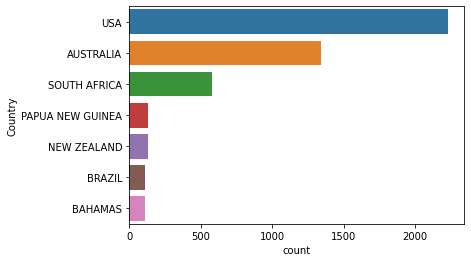

In [11]:
#Visual comparation of the countries where it seems have more attacks
sns.countplot(y=df_top_countries["Country"], order = (df_top_countries['Country'].value_counts().index))


<AxesSubplot:xlabel='count', ylabel='Country'>

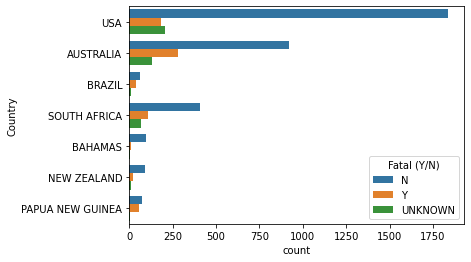

In [12]:
sns.countplot(y= df_top_countries["Country"] , hue = df_top_countries["Fatal (Y/N)"] )

# Hypothesis_2: 
## If the proportion of activities where people suffer shark attacks change between the countries

In [ ]:
In this case 

# Hypothesis_3:
## If the proportion of mortal attacks has changed through the years

In [15]:
attack['Year'].unique()

array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

In [24]:
# I´m going to use de remainder to group the years in decades
num = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
rem= []
for i in num:
    rem.append(i%10)

print(rem)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0]


In [45]:
def decade (year):
    dec=0
    if np.isnan(year) == True:
        dec = 0
    
    elif year%10 !=0:
       dec += (year - year%10)
    
    else:
        dec = year
    return dec


In [46]:
attack['Decades'] = attack['Year'].apply(decade)

In [49]:
decade_count = attack['Decades'].value_counts()

In [51]:
last_centuries = decade_count[decade_count > 50].index

In [53]:
df_last_centuries = attack[attack.Decades.isin(last_centuries)].copy()